# 多层感知机


In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

## 激活函数

### ReLu函数

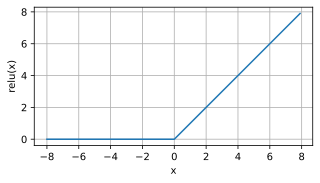

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

### ReLu函数的导数

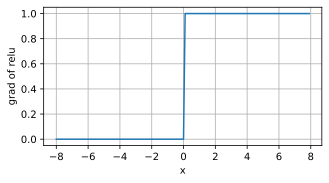

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

### sigmoid函数

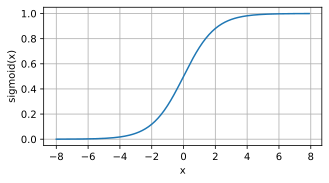

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

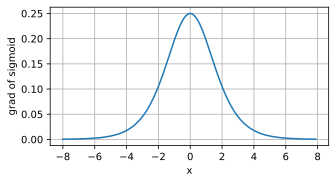

In [5]:
#导数
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### tanh函数

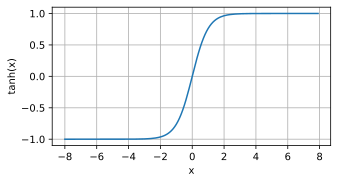

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

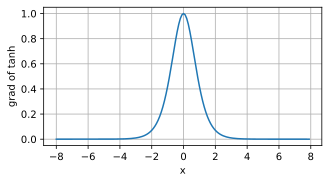

In [7]:
#导数
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 多层感知机从零开始实现 

In [8]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

初始化模型参数

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nn.Parameter(torch.randn(
num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
params = [W1, b1, W2, b2]

#### 激活函数

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

#### 模型 

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

#### 损失函数

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

#### 训练

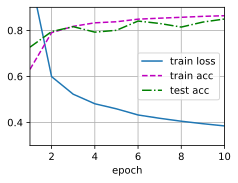

In [14]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

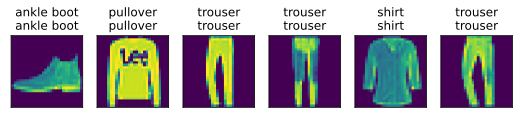

In [15]:
d2l.predict_ch3(net, test_iter)

## 多层感知机的简洁实现

In [16]:
import torch
from torch import nn
from d2l import torch as d2l

In [17]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

In [18]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

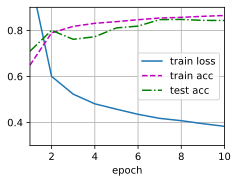

In [19]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 模型选择、欠拟合和过拟合

## 多项式回归

In [51]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据集 

In [52]:
max_degree = 20 # 多项式的最大阶数
n_train, n_test = 100, 100 # 训练和测试数据集大小
true_w = np.zeros(max_degree) # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [53]:
features = np.random.normal(size=(n_train + n_test, 1))
features

array([[ 1.89621559e-01],
       [ 5.64615322e-01],
       [ 8.97443272e-01],
       [-9.14335934e-01],
       [ 1.25660706e+00],
       [ 8.73724472e-01],
       [-9.43561682e-01],
       [-3.25752684e-01],
       [-1.42987487e+00],
       [ 4.75581881e-01],
       [ 1.13588806e+00],
       [-3.60874883e-01],
       [ 3.02992394e+00],
       [-7.71529451e-01],
       [-1.06115361e+00],
       [ 4.74722296e-01],
       [ 5.11808115e-01],
       [ 5.76553953e-01],
       [ 1.44399259e+00],
       [ 2.70820879e+00],
       [ 6.54833576e-01],
       [-1.37688756e+00],
       [ 2.01547076e+00],
       [ 5.84346821e-01],
       [-1.53044312e-01],
       [ 1.93255213e-01],
       [-2.10759416e-03],
       [-1.00843163e+00],
       [-2.26902895e+00],
       [ 1.47670350e+00],
       [ 7.49390232e-01],
       [ 5.43413086e-01],
       [ 2.23179074e-02],
       [ 2.30980867e-01],
       [-6.86492132e-01],
       [-1.67980069e+00],
       [-1.82895237e+00],
       [ 1.35989661e-01],
       [-1.3

np.random.normal 是 NumPy 库中的一个函数，用于生成服从正态分布（高斯分布）的随机样本。这个函数接受几个参数，其中最重要的是size，它指定了生成的随机数组的形状。
size=(n_train + n_test, 1) 指定生成的随机数组应该有n_train + n_test行，每行只有一个元素。这里的n_train和n_test是预先定义的训练集和测试集的大小。

In [54]:
np.random.shuffle(features)
features

array([[-2.02323113e-01],
       [-2.32162240e+00],
       [-1.17594113e+00],
       [ 2.18829944e-01],
       [ 9.08003342e-01],
       [-5.57752265e-01],
       [ 3.27407532e-01],
       [-2.60404902e-01],
       [-1.39593913e+00],
       [-7.12372248e-01],
       [ 1.09167896e-01],
       [ 2.03488591e+00],
       [-1.06115361e+00],
       [ 3.42619136e-01],
       [-4.50272253e-01],
       [ 1.93255213e-01],
       [-5.34014831e-01],
       [ 1.13588806e+00],
       [ 4.42980018e-01],
       [ 1.25975474e+00],
       [ 7.82945077e-01],
       [ 7.86097951e-01],
       [ 1.50689855e+00],
       [ 2.82021668e-01],
       [-1.25200066e+00],
       [ 1.25888959e+00],
       [-4.42239932e-01],
       [ 1.79597620e-01],
       [-1.55132783e+00],
       [ 1.44399259e+00],
       [-1.55574608e+00],
       [ 1.32850394e-02],
       [-1.46645009e+00],
       [ 6.69368978e-01],
       [ 1.32993844e+00],
       [-2.09798591e+00],
       [ 4.05621276e-01],
       [ 7.71936615e-01],
       [ 5.2

In [55]:
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
b=np.arange(max_degree)
c=np.arange(max_degree).reshape(1, -1)
poly_features,b,c

(array([[ 1.00000000e+00, -2.02323113e-01,  4.09346422e-02, ...,
         -1.59504701e-12,  3.22714877e-13, -6.52926787e-14],
        [ 1.00000000e+00, -2.32162240e+00,  5.38993056e+00, ...,
         -1.65370083e+06,  3.83926889e+06, -8.91333265e+06],
        [ 1.00000000e+00, -1.17594113e+00,  1.38283754e+00, ...,
         -1.57237045e+01,  1.84901509e+01, -2.17433289e+01],
        ...,
        [ 1.00000000e+00, -3.78893066e-01,  1.43559956e-01, ...,
         -6.83570293e-08,  2.59000044e-08, -9.81333208e-09],
        [ 1.00000000e+00,  3.41179768e-01,  1.16403634e-01, ...,
          1.15004700e-08,  3.92372770e-09,  1.33869651e-09],
        [ 1.00000000e+00,  3.56850148e-01,  1.27342028e-01, ...,
          2.46751608e-08,  8.80533478e-09,  3.14218502e-09]]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19]]))

In [56]:
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1) # gamma(n)=(n-1)!
poly_features

array([[ 1.00000000e+00, -2.02323113e-01,  2.04673211e-02, ...,
        -4.48440649e-27,  5.04055046e-29, -5.36747296e-31],
       [ 1.00000000e+00, -2.32162240e+00,  2.69496528e+00, ...,
        -4.64930920e-09,  5.99663354e-10, -7.32732565e-11],
       [ 1.00000000e+00, -1.17594113e+00,  6.91418771e-01, ...,
        -4.42065231e-14,  2.88801493e-15, -1.78743976e-16],
       ...,
       [ 1.00000000e+00, -3.78893066e-01,  7.17799778e-02, ...,
        -1.92182866e-22,  4.04537529e-24, -8.06718236e-26],
       [ 1.00000000e+00,  3.41179768e-01,  5.82018172e-02, ...,
         3.23330799e-23,  6.12855150e-25,  1.10049357e-26],
       [ 1.00000000e+00,  3.56850148e-01,  6.36710142e-02, ...,
         6.93731597e-23,  1.37532346e-24,  2.58307570e-26]])

In [57]:
labels = np.dot(poly_features, true_w)
labels

array([  4.67989348, -18.62798677,  -0.27967969,   5.19096922,
         5.38671837,   3.63990589,   5.24341326,   4.55575488,
        -2.52667048,   2.94503728,   5.11195579,   8.26681382,
         0.69708756,   5.24912162,   4.02980216,   5.17515181,
         3.73225648,   5.53752026,   5.27911426,   5.67976385,
         5.34538017,   5.34618717,   6.1416758 ,   5.22414997,
        -0.99884399,   5.67858828,   4.05610713,   5.1660899 ,
        -4.43740075,   5.99826032,  -4.49589734,   5.0156442 ,
        -3.35887696,   5.3214693 ,   5.78456414, -13.61896325,
         5.2693341 ,   5.34263808,   5.29671695,   5.17395697,
         6.07043341,   4.00821319,   5.19798014,   5.65348788,
        12.81415431,   5.30358898,   5.22176374,  -7.77869649,
        -2.31146609,   5.28720688,   5.085614  ,   3.63534448,
         0.7220218 ,   8.31378824,   5.1340964 ,   5.03041713,
         5.3823622 ,   5.28783011,   5.02235994,   4.15928199,
       -16.19964151,   5.4546745 ,   9.93344203,   5.30

In [58]:
labels += np.random.normal(scale=0.1, size=labels.shape)
labels

array([  4.67992702, -18.59674643,  -0.13425523,   5.17100045,
         5.48594125,   3.68727425,   5.21222135,   4.53561905,
        -2.53383369,   2.72417298,   5.00258752,   8.29000808,
         0.77998799,   5.20485562,   4.04019536,   5.11046482,
         3.71059855,   5.81828653,   5.25910835,   5.7197423 ,
         5.2585228 ,   5.33008472,   6.04125017,   5.20436154,
        -1.04166891,   5.58927373,   4.0587056 ,   5.28237325,
        -4.68046187,   5.87398532,  -4.48943025,   5.07730025,
        -3.52203314,   5.20605233,   5.72687396, -13.59545564,
         5.35797282,   5.25642656,   5.22453319,   5.07964289,
         6.04905888,   3.88466954,   5.27693318,   5.68672756,
        12.85393581,   5.25810571,   5.15666825,  -7.7364727 ,
        -2.30780425,   5.26974954,   4.93998361,   3.73334689,
         0.63111107,   8.13881043,   5.084445  ,   4.93834186,
         5.34365392,   5.1298974 ,   4.87414477,   4.30676781,
       -16.33381397,   5.50880219,   9.78868785,   5.20

In [59]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]

In [60]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.2023],
         [-2.3216]]),
 tensor([[ 1.0000e+00, -2.0232e-01,  2.0467e-02, -1.3803e-03,  6.9819e-05,
          -2.8252e-06,  9.5267e-08, -2.7535e-09,  6.9638e-11, -1.5655e-12,
           3.1673e-14, -5.8257e-16,  9.8222e-18, -1.5287e-19,  2.2092e-21,
          -2.9798e-23,  3.7680e-25, -4.4844e-27,  5.0406e-29, -5.3675e-31],
         [ 1.0000e+00, -2.3216e+00,  2.6950e+00, -2.0856e+00,  1.2105e+00,
          -5.6205e-01,  2.1748e-01, -7.2129e-02,  2.0932e-02, -5.3996e-03,
           1.2536e-03, -2.6458e-04,  5.1187e-05, -9.1413e-06,  1.5159e-06,
          -2.3462e-07,  3.4044e-08, -4.6493e-09,  5.9966e-10, -7.3273e-11]]),
 tensor([  4.6799, -18.5967]))

#### 对模型进行训练和测试

In [61]:
def evaluate_loss(net, data_iter, loss): #@save
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2) # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [62]:
def train(train_features, test_features, train_labels, test_labels,num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

#### 三阶多项式函数拟合(正常)

weight: [[ 4.975622   1.2201806 -3.3987143  5.584577 ]]


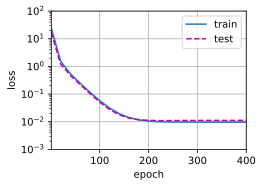

In [63]:
#从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
labels[:n_train], labels[n_train:])

#### 线性函数拟合(欠拟合)

weight: [[2.9443722 4.1891203]]


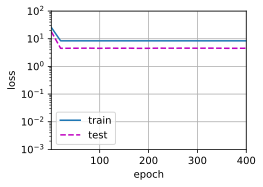

In [64]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
labels[:n_train], labels[n_train:])

#### 高阶多项式函数拟合(过拟合)

weight: [[ 4.9565425   1.3092527  -3.3132648   5.085556   -0.28741887  1.4774783
   0.13278322  0.12857257  0.0850872   0.1856934  -0.07008471  0.03688168
   0.06929847 -0.15307309 -0.12056431 -0.21118276  0.14372624 -0.05117713
   0.02526933 -0.15824416]]


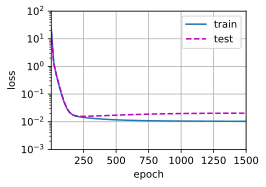

In [65]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
labels[:n_train], labels[n_train:], num_epochs=1500)

## 权重衰减

我们根据估计值与观测值之间的差异来更新w。然而，我们同时也在试图将w的大小
缩小到零。这就是为什么这种方法有时被称为权重衰减。我们仅考虑惩罚项，优化算法在训练的每一步衰减
权重。与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。较小的λ值对应较少
约束的w，而较大的λ值对w的约束更大。

#### 高维线性回归

In [66]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [67]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

### 权重衰减从零开始实现 

#### 初始化模型参数

In [68]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 定义L2范数惩罚

In [69]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 定义训练代码实现

In [70]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

#### 忽略正则化直接训练

w的L2范数是： 12.476597785949707


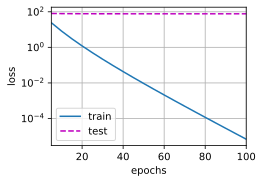

In [71]:
train(lambd=0)

#### 使用权重衰减

w的L2范数是： 0.40095382928848267


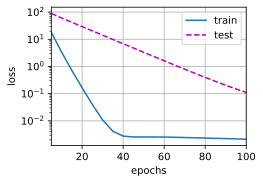

In [72]:
train(lambd=3)

### 简洁实现

In [74]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.757365226745605


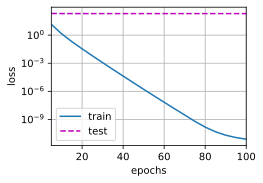

In [75]:
train_concise(0)

w的L2范数： 0.35533732175827026


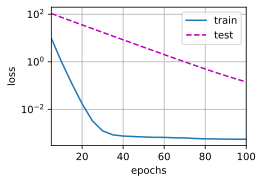

In [76]:
train_concise(3)

## 暂退法

然后在2014年，斯里瓦斯塔瓦等人 (Srivastava et al., 2014) 就如何将毕晓普的想法应用于网络的内部层提出
了一个想法：在训练过程中，他们建议在计算后续层之前向网络的每一层注入噪声。因为当训练一个有多层
的深层网络时，注入噪声只会在输入‐输出映射上增强平滑性。
这个想法被称为暂退法（dropout）。暂退法在前向传播过程中，计算每一内部层的同时注入噪声，这已经成为
训练神经网络的常用技术。这种方法之所以被称为暂退法，因为我们从表面上看是在训练过程中丢弃（drop
out）一些神经元。在整个训练过程的每一次迭代中，标准暂退法包括在计算下一层之前将当前层中的一些节
点置零

#### 从零开始实现

In [77]:
import torch
from torch import nn
from d2l import torch as d2l
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [78]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  6.,  8.,  0., 12.,  0.],
        [16., 18., 20.,  0.,  0.,  0., 28.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


#### 定义模型参数

In [79]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

#### 定义模型

In [81]:
dropout1, dropout2 = 0.2, 0.5
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

#### 训练和测试

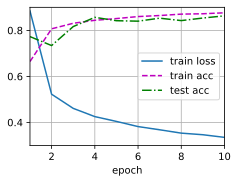

In [82]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 简洁实现

In [83]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    # 在第一个全连接层之后添加一个dropout层
                    nn.Dropout(dropout1),
                    nn.Linear(256, 256),
                    nn.ReLU(),
                    # 在第二个全连接层之后添加一个dropout层
                    nn.Dropout(dropout2),
                    nn.Linear(256, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

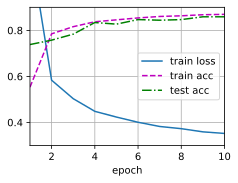

In [84]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)